<a href="https://colab.research.google.com/github/krappis4/example1-apps/blob/master/Statistics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline
import statistics
import ssl
from decimal import Decimal
from sklearn import preprocessing

In [74]:
ssl._create_default_https_context = ssl._create_unverified_context

url="https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv"
dt = pd.read_csv(url, header=None)
dt = dt.iloc[:, [0, 1, 3, 4, 5, 6, 10, 22]]
dt.columns =["surgery?", "Age", "rectal temperature", "pulse", "respiratory rate", "temperature of extremities", "pain", "outcome"]
dt


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [75]:
a = ["surgery?", "Age", "rectal temperature", "pulse", "respiratory rate", "temperature of extremities", "pain", "outcome"]
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce', downcast='integer')
def replace_(df, r):
  df = df.replace('?', r)
  return df
def statistics_(name, a):
  ans = []
  #df = dt.replace(0, np.nan)
  df = dt
  for i in a:
    k = 0
    if name == 'mean':
      k = statistics.mean(df[i])
    elif name == 'median':
      k = statistics.median(df[i])
    elif name == 'mode':
      k = statistics.mode(df[i])
    elif name == 'min':
      k = min(df[i])
    elif name == 'max':
      k = max(df[i])
    elif name == 'standard deviation':
      k = statistics.pstdev(df[i])
    elif name == 'variance':
      k = statistics.pvariance(df[i])
    elif name == 'scope':
      k = max(df[i]) - min(df[i])
    elif name == 'null':
      #k = df[i].isnull().sum()
      k = len(df[df[i] == 0])
    ans.append(k)
  return ans
dt = replace_(dt, 0)
coerce_df_columns_to_numeric(dt, a)
print(statistics_('mean', a))
#print(statistics_('median', a))
#print(statistics_('mode', a))
#print(statistics_('min', a))
#print(statistics_('max', a))
#print(statistics_('standard deviation', a))
print(statistics_('variance', a))
print(statistics_('null', a))
#print(statistics_('scope', a))
print(dt)

def show_(x, y, p):
  df = dt.loc[(dt[a[x]] <= p[1]) & (dt[a[x]] >= p[0]), :]
  xx = df[a[x]]
  if y == -1:
    yy = [i for i in range(len(xx))]
  else:
    yy = df[a[y]]
  #yy = dt.loc[(dt[a[y]] < p[3]) & (dt[a[y]] > p[2]), a[y]]
  #xx = dt[a[x]]
  #yy = dt[a[y]]
  fig, ax = plt.subplots()
  ax.scatter(xx, yy, c='red', alpha=0.2, edgecolors='none')
  ax.grid(True)
  plt.xlabel(a[x])
  if y == -1:
    plt.ylabel('range')
  else:
    plt.ylabel(a[y])
  plt.show()
#for i in range(len(a)):
  #show_(i, -1, [0, 1000])
dt.loc[dt[a[1]] >= 3, a[1]]=2
print(dt)

[1.3933333333333333, 1.64, 30.534333333333333, 66.16, 24.536666666666665, 1.91, 2.41, 1.5466666666666666]
[0.2452888888888889, 4.7104, 233.51358788888888, 1132.0210666666667, 394.3286555555556, 1.7219, 2.6952333333333334, 0.5478222222222222]
[1, 0, 60, 24, 58, 56, 55, 1]
     surgery?  Age  rectal temperature  pulse  respiratory rate  \
0           2    1                38.5     66                28   
1           1    1                39.2     88                20   
2           2    1                38.3     40                24   
3           1    9                39.1    164                84   
4           2    1                37.3    104                35   
..        ...  ...                 ...    ...               ...   
295         1    1                 0.0    120                70   
296         2    1                37.2     72                24   
297         1    1                37.5     72                30   
298         1    1                36.5    100             

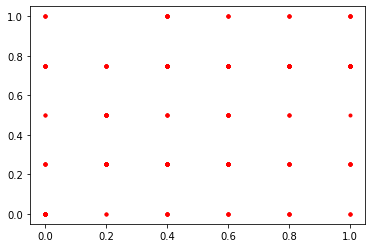

0.36682016120764543


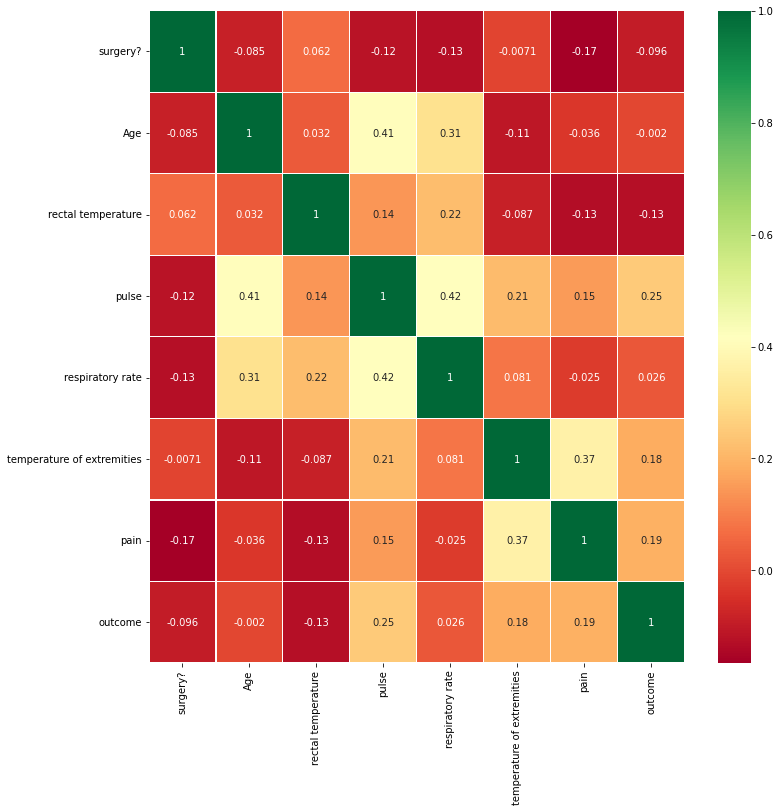

In [76]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(dt[['pain', 'temperature of extremities']])
dt_norm = pd.DataFrame(np_scaled)
a_t = dt_norm[0]
b_t = dt_norm[1]
plt.plot(a_t, b_t, 'r.')
plt.show()
corr, p_value = pearsonr(a_t, b_t)
print(corr)
sns.heatmap(dt.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()